In [1]:
import torch
from torch import nn, optim
from torch.nn import functional as F
import mltools
from d2l import torch as d2l

In [2]:
train_iter, vocab = d2l.load_data_time_machine(batch_size=32, num_steps=35)
rnn_layer = nn.LSTM(len(vocab), hidden_size=256, num_layers=1, batch_first=True)  # 定义循环网络LSTM
model = mltools.RNNPModel(lambda x: F.one_hot(x, len(vocab)), rnn_layer, output_size=len(vocab))  # 定义训练模型
device = torch.device('cuda')


class LSTMTM(mltools.RNNPLearning):
    def predict(self, prefix, num_preds=50):
        '''预测模型'''
        self.model.eval()  # 验证模式
        outputs = vocab[list(prefix)]
        state = None
        for y in prefix:  # 预热期
            _, state = model(torch.tensor([vocab[y]], device=device).reshape(1, 1), state)
        for _ in range(num_preds):  # 预测num_preds步
            y, state = model(torch.tensor([outputs[-1]], device=device).reshape(1, 1), state)
            outputs.append(int(y.argmax(dim=1).reshape(1)))
        print(''.join([vocab.idx_to_token[i] for i in outputs]))


ml = LSTMTM(model, train_iter, device=device)

2025-05-22 20:37:09,445 - INFO: train perplexity 1.520, 0.1 sec/epoch on cuda


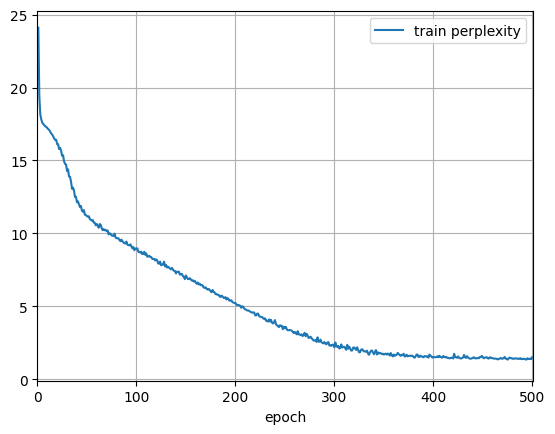

In [3]:
ml.set_loss(nn.CrossEntropyLoss())
ml.set_optimizer(optim.SGD(model.parameters(), lr=1))
ml.train(num_epochs=500)  # 训练

In [4]:
ml.test()

2025-05-22 20:37:09,620 - INFO: test acc 28.836


In [5]:
ml.predict('time traveller ')

time traveller for so it will be convenient to speak of himwas ex
